In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('./Datasets/winequality-white.csv', delimiter=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

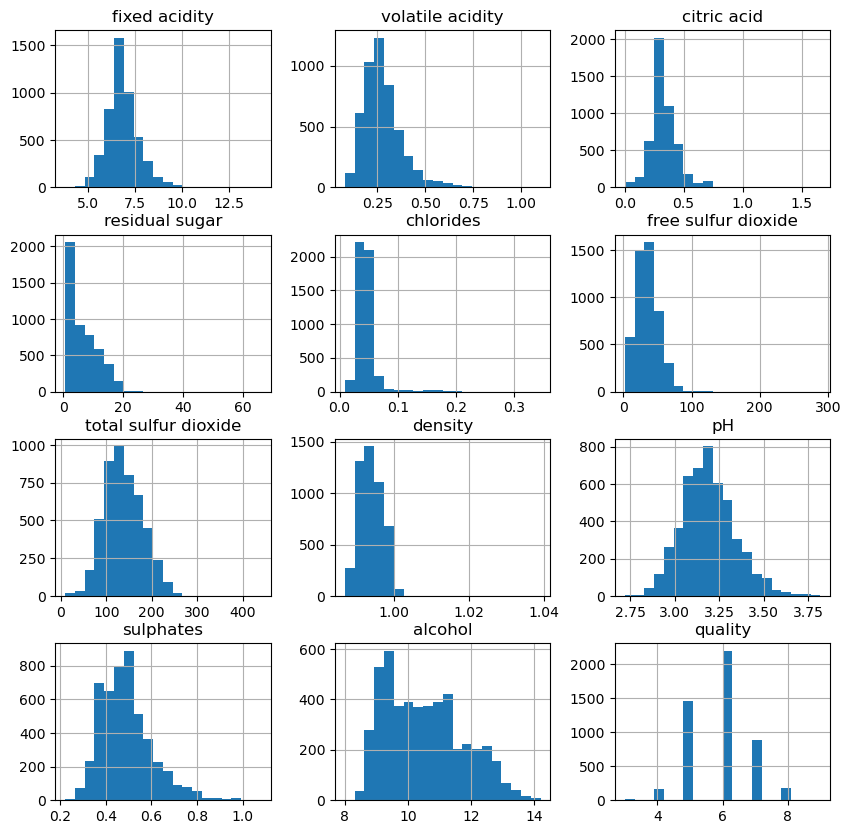

In [7]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

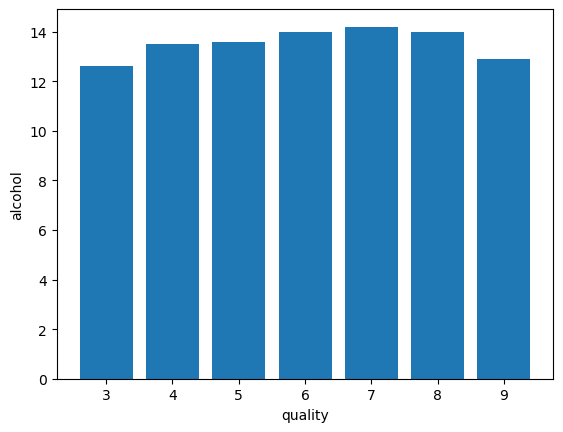

In [8]:

plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


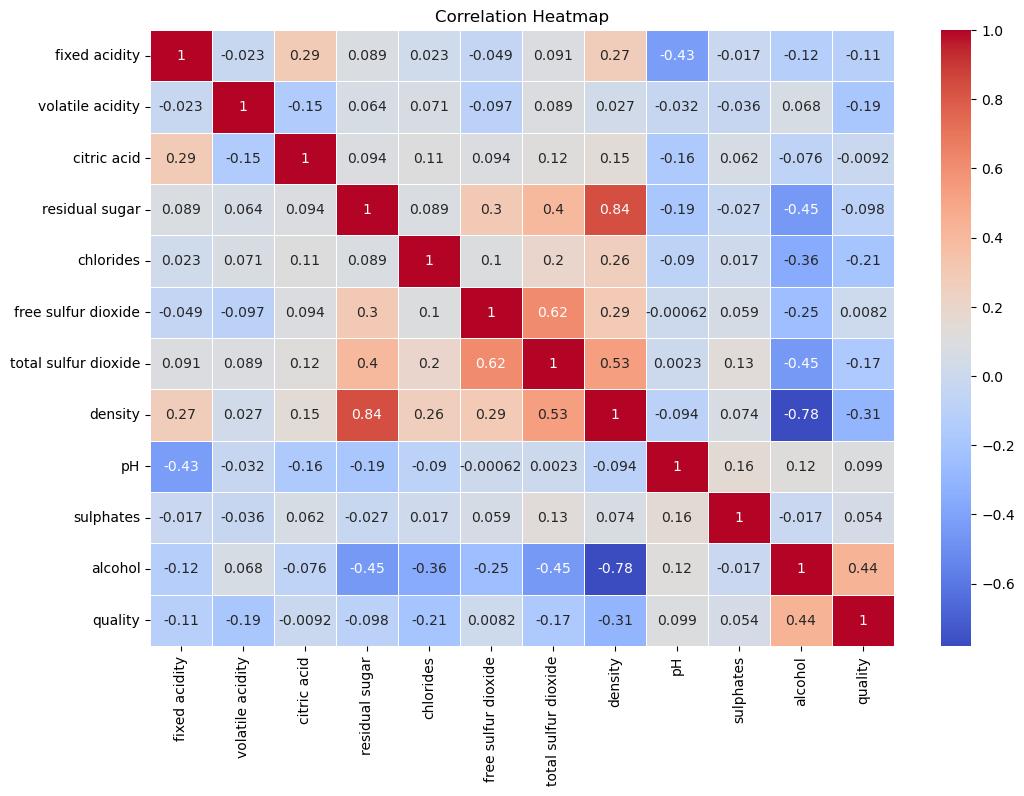

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

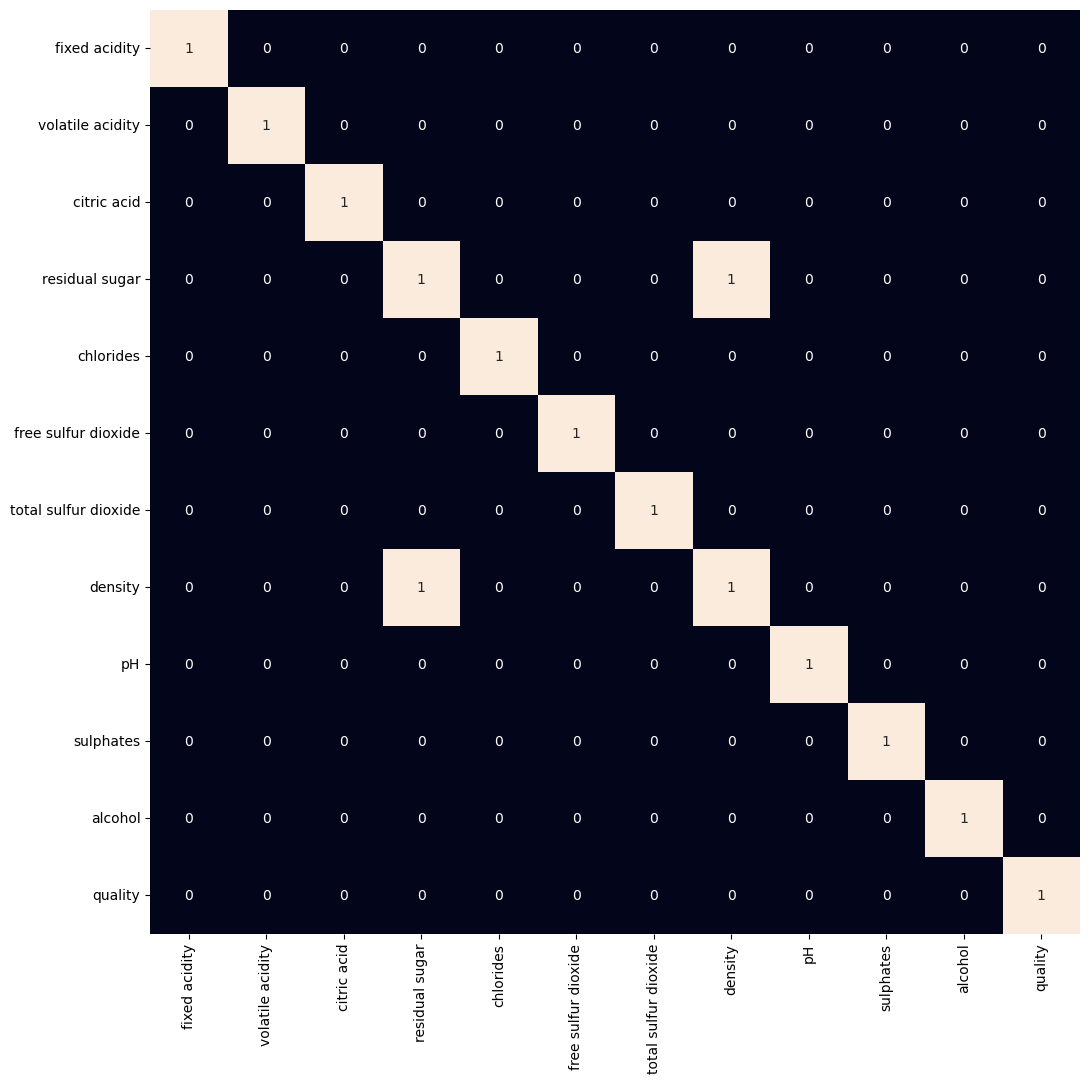

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


In [11]:
df.drop(columns=['residual sugar'], inplace=True)

In [12]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [13]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((3918, 10), (980, 10))

In [14]:
# Decision Tree Classifier
print("Decision Tree Classifier")
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(xtrain, ytrain)
y_pred_dtc = dtc.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, y_pred_dtc)}")
print(confusion_matrix(ytest, y_pred_dtc))
print(classification_report(ytest, y_pred_dtc))

Decision Tree Classifier
Accuracy: 0.7979591836734694
[[240  90]
 [108 542]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       330
           1       0.86      0.83      0.85       650

    accuracy                           0.80       980
   macro avg       0.77      0.78      0.78       980
weighted avg       0.80      0.80      0.80       980



In [29]:
# Rule-Based Classifier (Using Decision Tree rules)
print("\nRule-Based Classifier")
from sklearn.tree import export_text
tree_rules = export_text(dtc, feature_names=list(xtrain.columns))
print(tree_rules)


Rule-Based Classifier
|--- alcohol <= 10.25
|   |--- volatile acidity <= 0.25
|   |   |--- free sulfur dioxide <= 23.50
|   |   |   |--- fixed acidity <= 6.95
|   |   |   |   |--- density <= 0.99
|   |   |   |   |   |--- pH <= 3.32
|   |   |   |   |   |   |--- density <= 0.99
|   |   |   |   |   |   |   |--- free sulfur dioxide <= 9.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- free sulfur dioxide >  9.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- density >  0.99
|   |   |   |   |   |   |   |--- pH <= 2.97
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- pH >  2.97
|   |   |   |   |   |   |   |   |--- free sulfur dioxide <= 9.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- free sulfur dioxide >  9.50
|   |   |   |   |   |   |   |   |   |--- fixed acidity <= 5.15
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   

In [30]:
# k-Nearest Neighbors Classifier
print("\nk-Nearest Neighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
y_pred_knn = knn.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, y_pred_knn)}")
print(confusion_matrix(ytest, y_pred_knn))
print(classification_report(ytest, y_pred_knn))


k-Nearest Neighbors Classifier
Accuracy: 0.7
[[161 169]
 [125 525]]
              precision    recall  f1-score   support

           0       0.56      0.49      0.52       330
           1       0.76      0.81      0.78       650

    accuracy                           0.70       980
   macro avg       0.66      0.65      0.65       980
weighted avg       0.69      0.70      0.69       980



In [32]:
# Bayesian Classifier
print("\nBayesian Classifier")
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
y_pred_gnb = gnb.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, y_pred_gnb)}")
print(confusion_matrix(ytest, y_pred_gnb))
print(classification_report(ytest, y_pred_gnb))


Bayesian Classifier
Accuracy: 0.7183673469387755
[[182 148]
 [128 522]]
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       330
           1       0.78      0.80      0.79       650

    accuracy                           0.72       980
   macro avg       0.68      0.68      0.68       980
weighted avg       0.71      0.72      0.72       980



In [33]:
# Artificial Neural Network Classifier
print("\nArtificial Neural Network Classifier")
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(xtrain, ytrain)
y_pred_mlp = mlp.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, y_pred_mlp)}")
print(confusion_matrix(ytest, y_pred_mlp))
print(classification_report(ytest, y_pred_mlp))


Artificial Neural Network Classifier
Accuracy: 0.7316326530612245
[[115 215]
 [ 48 602]]
              precision    recall  f1-score   support

           0       0.71      0.35      0.47       330
           1       0.74      0.93      0.82       650

    accuracy                           0.73       980
   macro avg       0.72      0.64      0.64       980
weighted avg       0.73      0.73      0.70       980



In [34]:
# Model Comparison using Cross-Validation
print("\nModel Comparison using Cross-Validation")
classifiers = {
    'Decision Tree': dtc,
    'k-NN': knn,
    'Naive Bayes': gnb,
    'Neural Network': mlp
}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, xtrain, ytrain, cv=5)
    print(f"{name} Accuracy: {scores.mean()} (+/- {scores.std() * 2})")


Model Comparison using Cross-Validation
Decision Tree Accuracy: 0.7672322568874292 (+/- 0.020456303641408116)
k-NN Accuracy: 0.7057165011598509 (+/- 0.028942501471929654)
Naive Bayes Accuracy: 0.7118428597492636 (+/- 0.016486835585664834)
Neural Network Accuracy: 0.7059641097818437 (+/- 0.02865873016820894)


In [35]:
# Overfitting and Validation
print("\nOverfitting and Validation")
# Grid Search to find optimal hyperparameters for Decision Tree
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)

best_dtc = grid_search.best_estimator_
y_pred_best_dtc = best_dtc.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, y_pred_best_dtc)}")
print(confusion_matrix(ytest, y_pred_best_dtc))
print(classification_report(ytest, y_pred_best_dtc))


Overfitting and Validation
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ma

In [36]:
# Grid Search to find optimal hyperparameters for k-NN
print("\nGrid Search for k-Nearest Neighbors")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(xtrain, ytrain)
print("Best parameters found by Grid Search for k-NN:")
print(grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, y_pred_best_knn)}")
print(confusion_matrix(ytest, y_pred_best_knn))
print(classification_report(ytest, y_pred_best_knn))


Grid Search for k-Nearest Neighbors
Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s

[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END .

In [37]:
# Grid Search to find optimal hyperparameters for MLP Classifier
print("\nGrid Search for MLP Classifier")
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=2)
grid_search_mlp.fit(xtrain, ytrain)
print("Best parameters found by Grid Search for MLP Classifier:")
print(grid_search_mlp.best_params_)

best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, y_pred_best_mlp)}")
print(confusion_matrix(ytest, y_pred_best_mlp))
print(classification_report(ytest, y_pred_best_mlp))


Grid Search for MLP Classifier
Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_siz